# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

In [2]:
I_unif = np.loadtxt("int_uniform.out")
I_circle = np.loadtxt("int_circle.out")
I_lin = np.loadtxt("int_linear.out")

nblocks1 = I_unif[:, 0]
mean1 = I_unif[:, 1]
stddev1 = I_unif[:, 2]

nblocks2 = I_circle[:, 0]
mean2 = I_circle[:, 1]
stddev2 = I_circle[:, 2]

nblocks3 = I_lin[:, 0]
mean3 = I_lin[:, 1]
stddev3 = I_lin[:, 2]

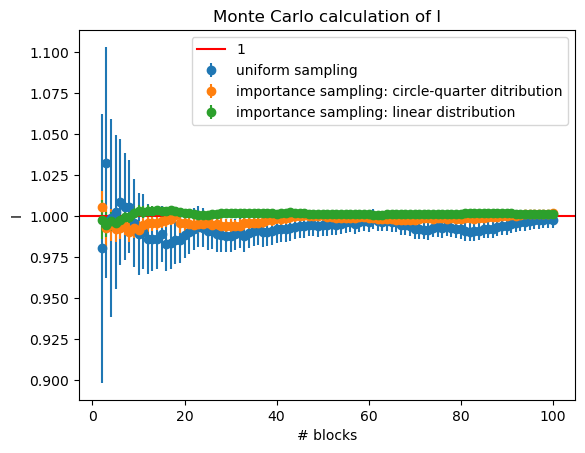

In [3]:
plt.figure(1)

plt.errorbar(nblocks1, mean1, yerr=stddev1, fmt='o', label='uniform sampling')
plt.errorbar(nblocks2, mean2, yerr=stddev2, fmt='o', label='importance sampling: circle-quarter ditribution')
plt.errorbar(nblocks3, mean3, yerr=stddev3, fmt='o', label='importance sampling: linear distribution')

plt.axhline( y=1, color='r', label= '1')
plt.xlabel('# blocks')
plt.ylabel('I')
plt.title('Monte Carlo calculation of I')
plt.legend()

plt.show()

### Comments
Two different distributions have been used to perform the importance sampling:
- The circle-quarter distribution $p(x)$ over an interval $[a, b]$ has the shape of a quarter of a circle suitably rescaled (multiplying a factor $k$) in order to ensure $\int_a^bp(x)dx = 1$. The distribution is such that $p(a) = k(b-a)$, where $(b-a)$ is the radius before resclaing, while $p(b) = 0$. In our case $a = 0$, $b = 1$. The circle-quarter distribution is sampled with the accept/reject method.
- Once the endpoints of the interval $a$ and $b$ are chosen, the linear distribution has only one degree of freedom left, the fourth one being imposed by the normalization condition. In this case $p(1) = 0.1$ was chosen. The linear distribution is easy and efficient to sample, since its cumulative (a quadratic function) can be inverted.

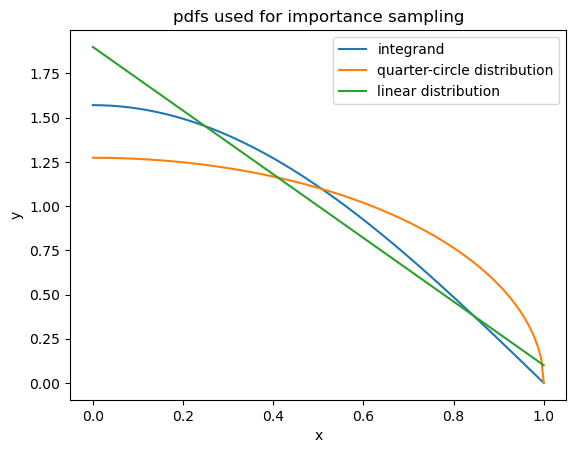

In [4]:
x = np.linspace(0, 1, 200)
y1 = np.pi/2 * np.cos(np.pi/2 * x)
y2 = 4/np.pi * np.sqrt(1 - x**2)
y3 = -1.8*x + 1.9

plt.figure(2)
plt.plot(x, y1, label='integrand')
plt.plot(x, y2, label='quarter-circle distribution')
plt.plot(x, y3, label='linear distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('pdfs used for importance sampling')
plt.legend()

plt.show()

### Conclusions
As expected, the importance sampling method leads to a faster convergence: for the same amount of blocks the variance is consistently lower.

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

In [5]:
from scipy.optimize import curve_fit

def f(N, k):
    return k*np.sqrt(N)

RW_disc = np.loadtxt("RW_lattice.out")
RW_cont = np.loadtxt("RW_continuum.out")

nsteps1 = RW_disc[:, 0]
av1 = RW_disc[:, 1]
error1 = RW_disc[:, 2]

nsteps2 = RW_cont[:, 0]
av2 = RW_cont[:, 1]
error2 = RW_cont[:, 2]

k =  0.9969146918159122


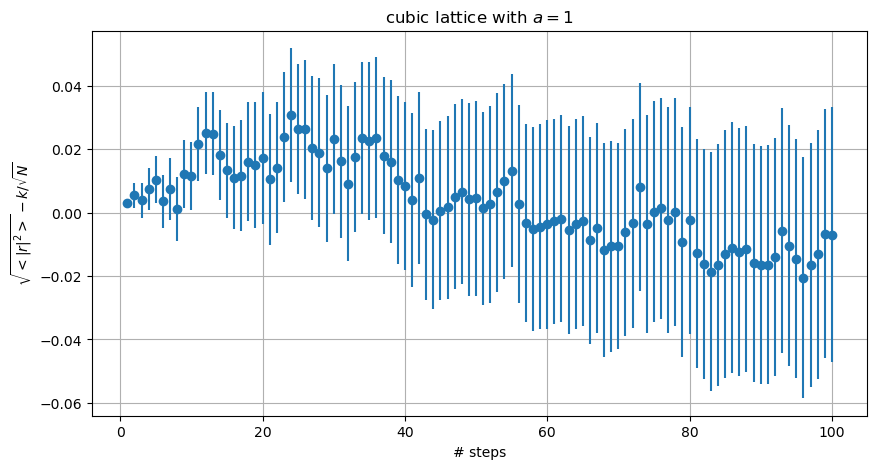

In [6]:
plt.figure(3, figsize=(10, 5))


k1, covariance1 = curve_fit(f, nsteps1, av1, p0=1)
print('k = ', *k1)

plt.errorbar(nsteps1, av1-f(nsteps1, k1), yerr=error1, fmt='o')
plt.xlabel('# steps')
plt.ylabel(r'$ \sqrt{<|r|^2>} - k/\sqrt{N}$')
plt.title('cubic lattice with $a = 1$')
plt.grid(True)
plt.show()

k =  1.0015667294454038


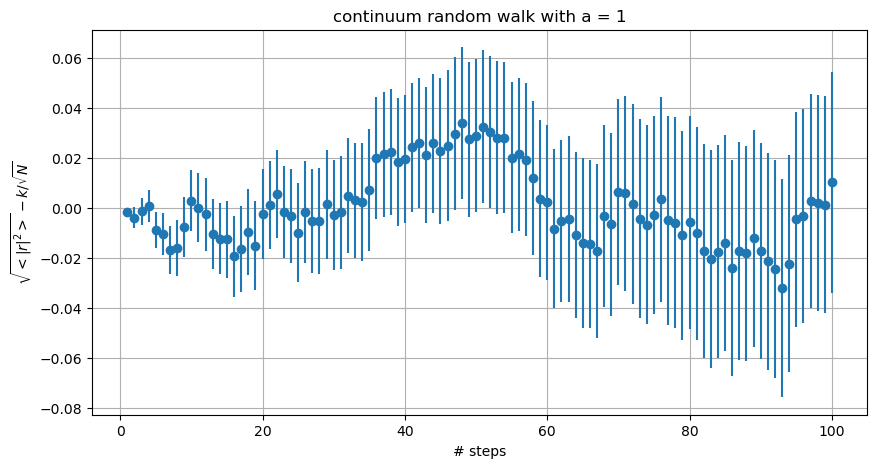

In [7]:
plt.figure(4, figsize=(10, 5))

k2, covariance2 = curve_fit(f, nsteps2, av2, p0=1)
print('k = ',*k2)

plt.errorbar(nsteps2, av2-f(nsteps2, k2), yerr=error2, fmt='o')
plt.xlabel('# steps')
plt.ylabel(r'$ \sqrt{<|r|^2>} - k/\sqrt{N}$')
plt.title('continuum random walk with a = 1')
plt.grid(True)
plt.show()

### Conclusions
In both the discrete and continuous case the function $f = k\sqrt{N}$, with $N$ number of steps and $k \simeq a = 1$ provides an accurate fit of $\sqrt{<|r|^2>}$. The root mean square of $\sqrt{<|r|^2>}$ increases with the number of steps, suggesting that the random walk is a diffusion process.